In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Distribution plot options

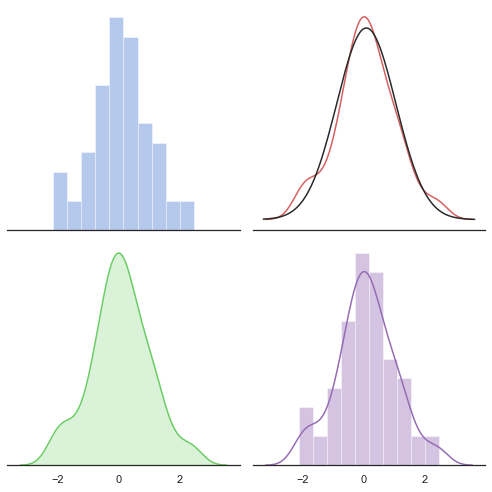

In [16]:
from scipy.stats import norm
sns.set(style='white',palette='muted',color_codes=True)
rs=np.random.RandomState(10)
f,axes=plt.subplots(2,2,figsize=(7,7),sharex=True)
axes=axes.flatten()
sns.despine(left=True) #If True, remove that spine.
d=rs.normal(size=100)
sns.distplot(d,kde=False,color='b',ax=axes[0])
sns.distplot(d,hist=False,fit=norm,color='r',ax=axes[1])
sns.distplot(d,hist=False,color='g',kde_kws={'shade':True},ax=axes[2])
sns.distplot(d,color='m',ax=axes[3])
plt.setp(axes,yticks=[])
plt.tight_layout()

In [ ]:
sns.distplot(df.loc[df['class'] == 'minivan', "cty"], color="g", 
             label="minivan", hist_kws={'alpha':.7}, 
             kde_kws={'linewidth':3})

### Joint plot
##### 边缘直方图
边缘直方图具有沿X和Y轴变量的直方图。这用于可视化X和Y之间的关系以及单独的X和Y的单变量分布。该图如果经常用于探索性数据分析（EDA）。

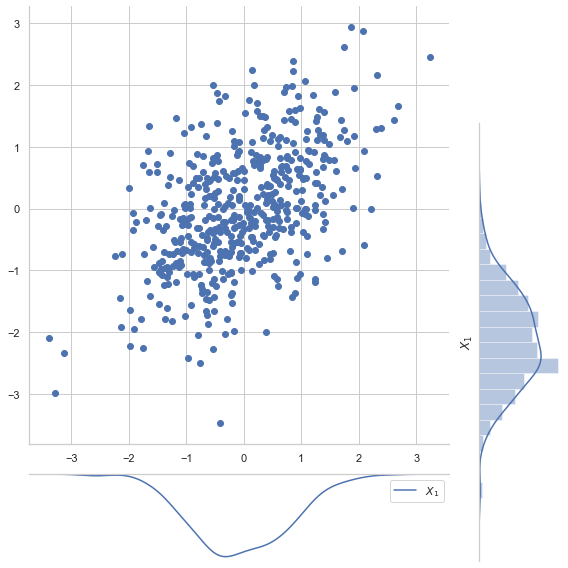

In [75]:
rs = np.random.RandomState(5)
mean = [0, 0]
cov = [(1, .5), (.5, 1)]
x1, x2 = rs.multivariate_normal(mean, cov, 500).T
x1 = pd.Series(x1, name="$X_1$")
x2 = pd.Series(x2, name="$X_2$")
fig = plt.figure(figsize=(8,8))
grid = gridspec.GridSpec(5,5)
'''wspace : The amount of width reserved for space between subplots,
    expressed as a fraction of the average axis width.
hspace : The amount of height reserved for space between subplots,
    expressed as a fraction of the average axis height.
    
    ax_bottom = fig.add_subplot(grid[-1, 0:-1], 
                            xticklabels=[], yticklabels=[])
                            '''
ax_joint=fig.add_subplot(grid[0:-1,:-1])
ax_marg_y = fig.add_subplot(grid[1:,-1])
ax_marg_x = fig.add_subplot(grid[-1,:-1])
plt.setp([ax_marg_x,ax_marg_y],yticks=[],xticks=[])
sns.despine(ax=ax_marg_y,bottom=True)
sns.despine(ax=ax_joint)
ax_joint.scatter(x1,x2)
sns.kdeplot(x1,ax=ax_marg_x)
sns.distplot(x1, ax=ax_marg_y,vertical=True)
ax_marg_x.invert_yaxis()
sns.despine(ax=ax_marg_x,left=True,bottom=True,top=False)
plt.tight_layout()

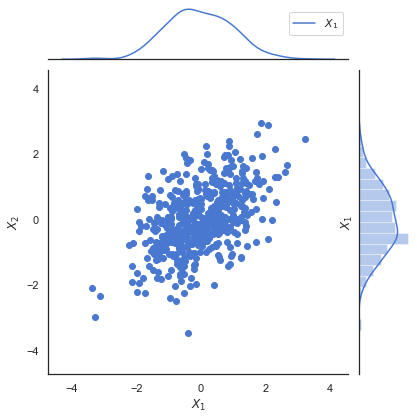

In [34]:
g = sns.JointGrid(x1, x2)
g.ax_joint.scatter(x1,x2)
sns.kdeplot(x1,ax=g.ax_marg_x)
sns.distplot(x1, ax=g.ax_marg_y,vertical=True)

In [ ]:
ax_main.scatter('displ', 'hwy', s=df.cty*4, 
                c=df.manufacturer.astype('category').cat.codes, 
                alpha=.9, data=df, cmap="tab10", edgecolors='gray', 
                linewidths=.5)
for item in ([ax_main.xaxis.label,
              ax_main.yaxis.label] + ax_main.get_xticklabels(
) + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)

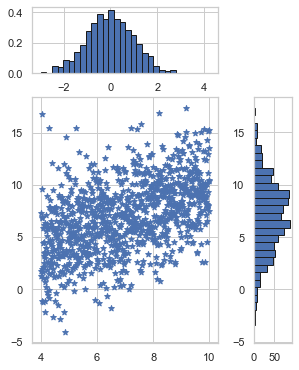

In [71]:
fig = plt.figure(figsize=(4,5))
ax1= plt.subplot2grid((4,4),(0,0),1,3)
ax2 = plt.subplot2grid((4,4),(1,0),3,3)
ax3= plt.subplot2grid((4,4),(1,3),3,1)
plt.tight_layout(pad=0)
x_1=np.linspace(4,10,1000)
x=np.random.randn(1000)
y=x*3+x_1
ax2.scatter(x_1, y, marker='*')
ax1.hist(x,bins=30, density=True,edgecolor='k');
ax3.hist(y,bins=30, density=False, 
         edgecolor='k', orientation='horizontal');

In [ ]:
##### 边缘箱形图
#边缘箱图与边缘直
#方图具有相似的用途。然而，箱线图有助于精确定位X和Y的中位数，第25和第75百分位数。
# Import Data
df = mpg_ggplot2
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*5, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

### Color palette choices

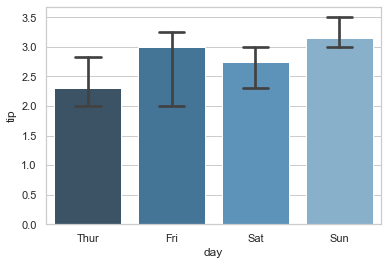

In [64]:
import seaborn as sns
sns.set_style('whitegrid')
tips=sns.load_dataset('tips')
from numpy import median
ax=sns.barplot(x='day',y='tip',data=tips,
               estimator=median,capsize=0.3,
               palette='Blues_d')

### Grouped barplots

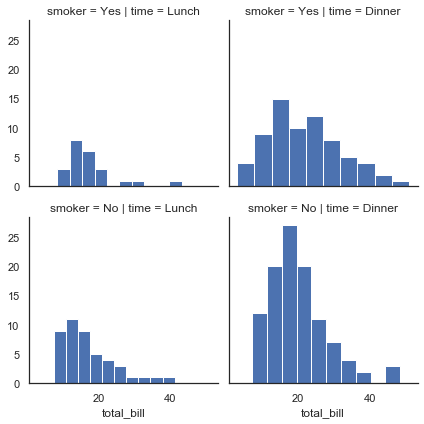

In [63]:
import matplotlib.patches as patches
import matplotlib.path as path
import numpy as np
def histplot(x,**kwargs):
    n,bins,_=plt.hist(x,**kwargs)
    left=np.array(bins[:-1])
    right=np.array(bins[1:])
    bottom=np.zeros(len(left))
    top=bottom+n
    xy=np.array([[left,left,right,right],[bottom,top,top,bottom]]).T
    barpath=path.Path.make_compound_path_from_polys(xy)
    patch=patches.PathPatch(barpath)
    ax=plt.gca()
    ax.add_patch(patch)
    ax.set_xlim(left[0],right[-1]+1)
    ax.set_ylim(bottom.min(),top.max()+5)
g=sns.FacetGrid(tips,col='time',row='smoker')
g=g.map(plt.hist,'total_bill',lw=1);

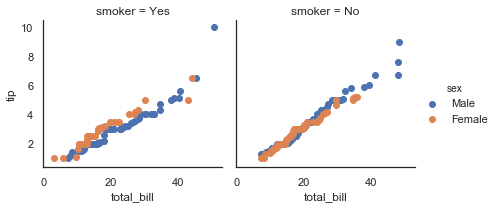

In [60]:
from scipy import stats
def qqplot(x,y,**kwargs):
    _,xr=stats.probplot(x,fit=False)
    _,yr=stats.probplot(y,fit=False)
    plt.scatter(xr,yr,**kwargs)
g=sns.FacetGrid(tips,col='smoker',hue='sex')
g=g.map(qqplot,'total_bill','tip').add_legend()

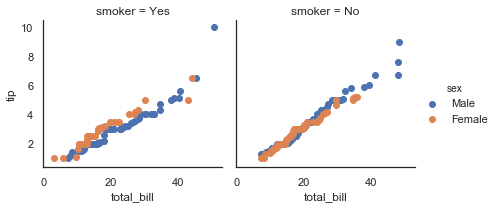

In [62]:
from scipy import stats
def qqplot(x,y,**kwargs):
    ax = plt.gca()
    data = kwargs.pop('data')
    _,xr=stats.probplot(data[x],fit=False)
    _,yr=stats.probplot(data[y],fit=False)
    ax.scatter(xr,yr,**kwargs)
g=sns.FacetGrid(tips,col='smoker',hue='sex')
g=g.map_dataframe(qqplot,'total_bill','tip').add_legend()

In [ ]:
class Geo(init_opts = opts.InitOpts())# 初始化配置项
def add_schema(
    maptype: str = "china",
    is_roam: bool = True,    # 是否开启鼠标缩放和平移漫游。
    label_opts = None,# 标签配置项
    itemstyle_opts=None,    # 地图区域的多边形 图形样式。
    emphasis_itemstyle_opts = None,    # 高亮状态下的多边形样式
    emphasis_label_opts=None,    # 高亮状态下的标签样式。
)

def add(
    series_name: str,    # 系列名称，用于 tooltip 的显示，legend 的图例筛选。
    data_pair: Sequence,    # 数据项 
    type_: str = "scatter",    # Geo 图类型
    is_selected: bool = True,    # 是否选中图例
    symbol: Optional[str] = None,    # 标记图形形状
    symbol_size: Numeric = 12,    # 标记的大小
    color: Optional[str] = None,    # 系列 label 颜色
    is_polyline: bool = False,    # 是否是多段线，在画 lines 图情况下
    label_opts= opts.LabelOpts(),    # 标签配置项
    effect_opts:  = opts.EffectOpts(),    # 涟漪特效配置项
    linestyle_opts = opts.LineStyleOpts(),    # 线样式配置项
    tooltip_opts = None,    # 提示框组件配置项
    itemstyle_opts = None,    # 图元样式配置项，
)

def add_coordinate(name: str,# 坐标地点名称
    longitude: Numeric,# 经度
    latitude: Numeric,)# 纬度
def add_coordinate_json(
    # { "阿城": [126.58, 45.32], "阿克苏": [80.19, 41.09]}
    json_file: str)
def get_coordinate(# 地点名称
    name: str) 